<a href="https://colab.research.google.com/github/Anveshious/Machine-Learning-Capstone-Project/blob/master/salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import files
uploaded = files.upload()  # Upload 'expected_ctc.csv'
import pandas as pd
df = pd.read_csv('expected_ctc.csv')

Saving expected_ctc.csv to expected_ctc (1).csv


In [16]:
!pip install xgboost shap  # Example: Install XGBoost and SHAP

EDA:

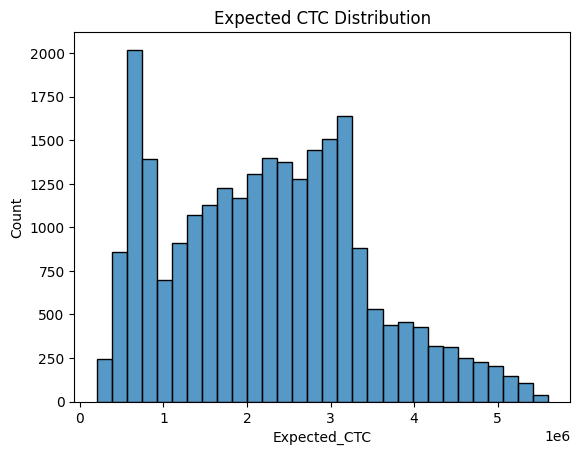

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution
sns.histplot(df['Expected_CTC'], bins=30)
plt.title("Expected CTC Distribution")
plt.show()

Pre-processing:

In [18]:
# Handle missing values
df.fillna({'Current_CTC': df['Current_CTC'].median()}, inplace=True)

Model Training:

In [19]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

Data Loading

In [20]:
# Load data
df = pd.read_csv("expected_ctc.csv")  # Update path

# Initial checks
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Display sample
df.head(3)

Shape: (25000, 29)

Data Types:
 IDX                                    int64
Applicant_ID                           int64
Total_Experience                       int64
Total_Experience_in_field_applied      int64
Department                            object
Role                                  object
Industry                              object
Organization                          object
Designation                           object
Education                             object
Graduation_Specialization             object
University_Grad                       object
Passing_Year_Of_Graduation           float64
PG_Specialization                     object
University_PG                         object
Passing_Year_Of_PG                   float64
PHD_Specialization                    object
University_PHD                        object
Passing_Year_Of_PHD                  float64
Curent_Location                       object
Preferred_location                    object
Current_CTC           

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325


Data Cleaning

In [21]:
# Handle missing values
df.fillna({
    'Current_CTC': df['Current_CTC'].median(),
    'Education': 'Unknown'
}, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Cap outliers (e.g., top 1%)
ctc_cap = df['Expected_CTC'].quantile(0.99)
df = df[df['Expected_CTC'] <= ctc_cap]

Validation:

In [22]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2760
Role                                   963
Industry                               908
Organization                           908
Designation                           3101
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7677
University_PG                         7677
Passing_Year_Of_PG                    7677
PHD_Specialization                   11813
University_PHD                       11813
Passing_Year_Of_PHD                  11813
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer          

Exploratory Data Analysis

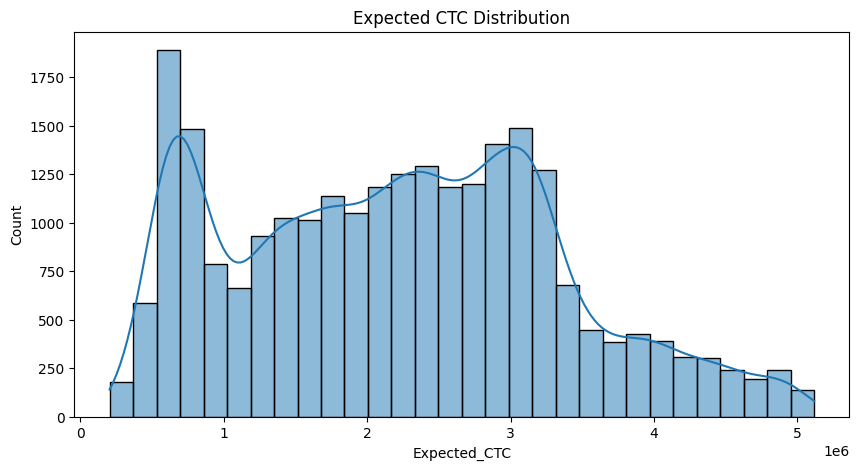

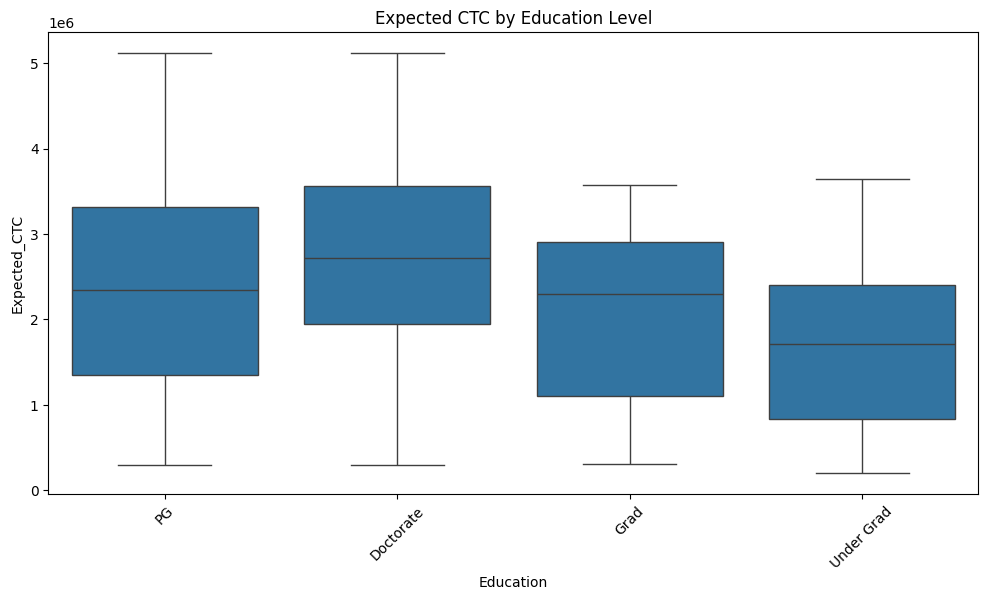

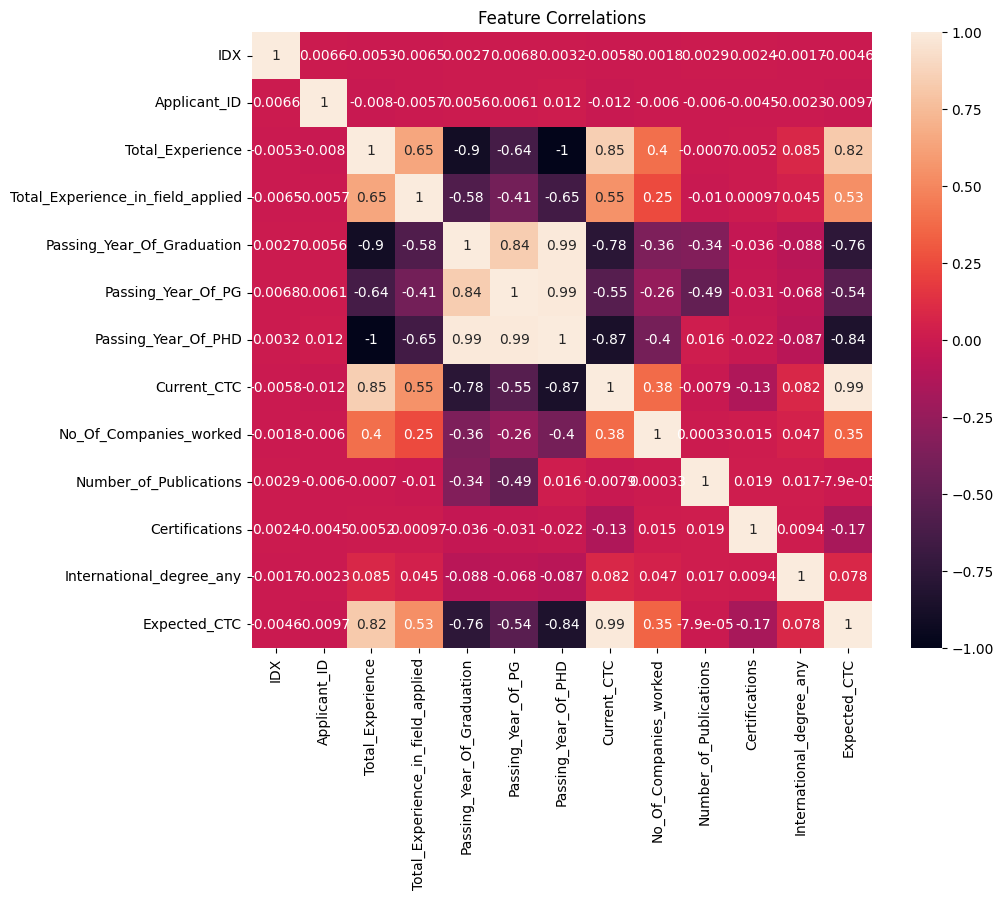

In [23]:
# 1. Target distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Expected_CTC'], bins=30, kde=True)
plt.title("Expected CTC Distribution")
plt.show()

# 2. Education impact
plt.figure(figsize=(12,6))
sns.boxplot(x='Education', y='Expected_CTC', data=df)
plt.xticks(rotation=45)
plt.title("Expected CTC by Education Level")
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.title("Feature Correlations")
plt.show()

Feature Engineering

In [24]:
# 1. Convert education to ordinal
edu_map = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df['Education_Level'] = df['Education'].map(edu_map)

# 2. One-hot encode departments
df = pd.get_dummies(df, columns=['Department'])

# 3. Create experience ratio
df['Experience_per_Company'] = df['Total_Experience'] / (df['No_Of_Companies_worked'] + 1)

Verification

In [25]:
print(df[['Education', 'Education_Level']].drop_duplicates())

     Education  Education_Level
0           PG              NaN
1    Doctorate              NaN
4         Grad              NaN
12  Under Grad              NaN


Train Test Split and Scaling

In [26]:
# Split features/target
X = df.drop(['Expected_CTC', 'Education'], axis=1)
y = df['Expected_CTC']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Current_CTC', 'Total_Experience']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [49]:
# Check which columns are non-numeric
print("Non-numeric columns:")
print(X_train.select_dtypes(include=['object']).columns.tolist())

Non-numeric columns:
['Role', 'Industry', 'Organization', 'Education', 'Graduation_Specialization', 'University_Grad', 'PG_Specialization', 'University_PG', 'PHD_Specialization', 'University_PHD', 'Curent_Location', 'Preferred_location', 'Inhand_Offer']


In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# List of your categorical columns
cat_cols = ['Role', 'Industry', 'Organization', 'Designation',
            'Graduation_Specialization', 'University_Grad',
            'PG_Specialization', 'University_PG',
            'PHD_Specialization', 'University_PHD',
            'Curent_Location', 'Preferred_location',
            'Inhand_Offer', 'Last_Appraisal_Rating']

# Copy the original dataframe
df_processed = df.copy()

In [41]:
label_encoders = {}

for col in ['Designation', 'Last_Appraisal_Rating']:  # Example ordinal columns
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le  # Save for later use

In [42]:
label_encoders = {}

for col in ['Designation', 'Last_Appraisal_Rating']:  # Example ordinal columns
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le  # Save for later use

In [43]:
print("Processed Columns:", df_processed.columns.tolist())
print("\nSample Data:")
print(df_processed.head(3))

Processed Columns: ['IDX', 'Applicant_ID', 'Total_Experience', 'Total_Experience_in_field_applied', 'Role', 'Industry', 'Organization', 'Designation', 'Education', 'Graduation_Specialization', 'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization', 'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization', 'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location', 'Preferred_location', 'Current_CTC', 'Inhand_Offer', 'Last_Appraisal_Rating', 'No_Of_Companies_worked', 'Number_of_Publications', 'Certifications', 'International_degree_any', 'Expected_CTC', 'Education_Level', 'Department_Accounts', 'Department_Analytics/BI', 'Department_Banking', 'Department_Education', 'Department_Engineering', 'Department_HR', 'Department_Healthcare', 'Department_IT-Software', 'Department_Marketing', 'Department_Others', 'Department_Sales', 'Department_Top Management', 'Experience_per_Company']

Sample Data:
   IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0   

In [44]:
from sklearn.model_selection import train_test_split

X = df_processed.drop('Expected_CTC', axis=1)
y = df_processed['Expected_CTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
import joblib

# Save label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

# Example: Save one-hot encoded column names
onehot_cols = list(set(df_processed.columns) - set(df.columns))
joblib.dump(onehot_cols, 'onehot_columns.pkl')

['onehot_columns.pkl']

In [46]:
# For new data prediction
def preprocess_new_data(input_df, label_encoders, onehot_cols):
    # Label Encoding
    for col, le in label_encoders.items():
        input_df[col] = le.transform(input_df[col])

    # One-Hot Encoding
    input_df = pd.get_dummies(input_df)

    # Align columns with training data
    for col in onehot_cols:
        if col not in input_df.columns:
            input_df[col] = 0

    return input_df[onehot_cols + list(label_encoders.keys())]